In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sig

%matplotlib inline

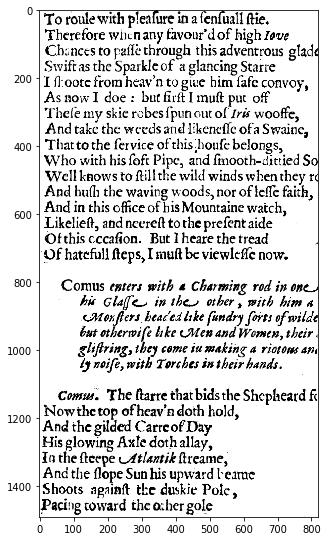

(1491, 821)


In [2]:
img = cv.imread("anon_blank_blank_00height_amaske-6914_page1r.tif", 0)
plt.figure(figsize=(5,10))
plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)

In [3]:
sumMatrix = np.sum(255 - img, 1)
print(sumMatrix.shape)

(1491,)


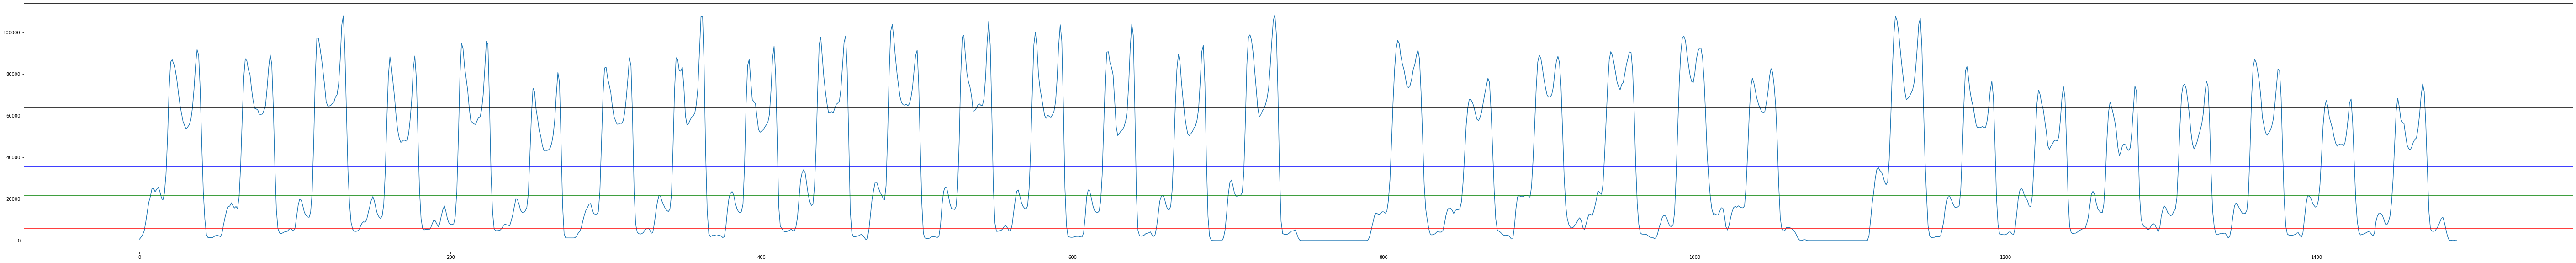

In [4]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
plt.axhline(y=np.percentile(sumMatrix, 25), color="red")
plt.axhline(y=np.percentile(sumMatrix, 50), color="green")
plt.axhline(y=np.percentile(sumMatrix, 75), color="black")
plt.axhline(y=np.mean(sumMatrix), color="blue")
plt.show()

In [5]:
peaks, _ = sig.find_peaks(-sumMatrix)
print(peaks)

[  10   15   30   47   61   78   92   99  109  122  139  155  168  171
  184  192  200  215  230  246  261  277  293  307  310  322  329  340
  347  352  371  386  399  416  420  432  444  467  478  492  506  523
  536  552  559  570  584  601  615  629  644  652  661  675  689  697
  705  720  737  746  789  801  816  831  845  860  882  889  894  906
  921  928  939  952  974  984  998 1013 1021 1044 1057 1067 1070 1111
 1123 1136 1154 1168 1182 1186 1198 1205 1215 1228 1233 1244 1261 1273
 1279 1291 1298 1306 1321 1336 1343 1353 1368 1384 1389 1399 1413 1417
 1428 1436 1445 1460 1475 1487]


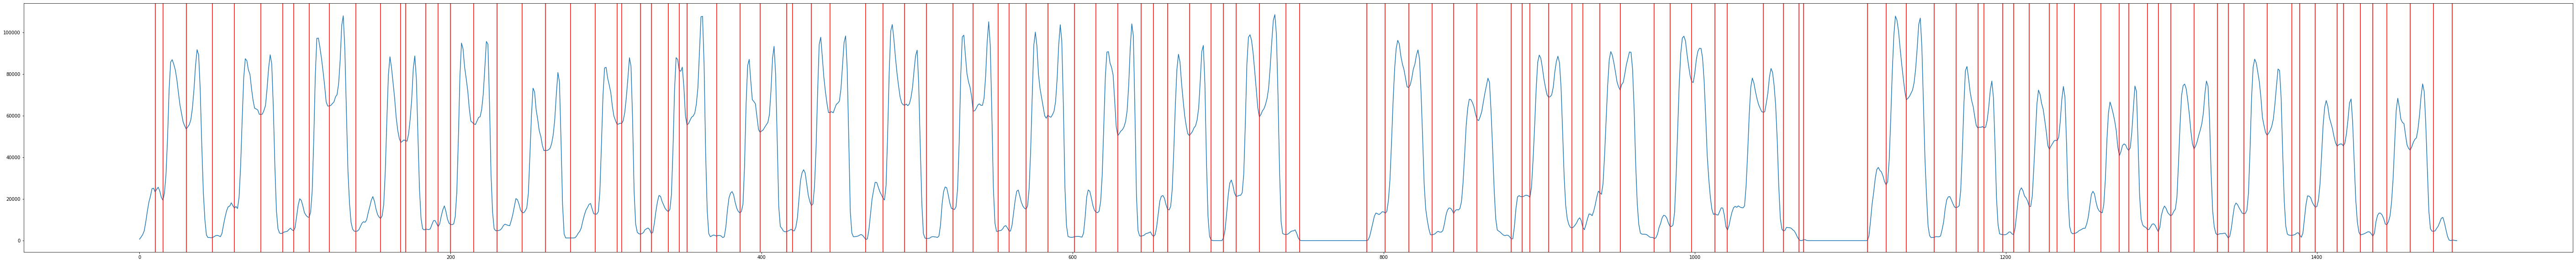

In [6]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for col in peaks:
    plt.axvline(x=col, color="red")
plt.show()

In [7]:
proms = sig.peak_prominences(-sumMatrix, peaks)[0]
print(proms)

[2.04800000e+03 8.19200000e+03 3.27680000e+04 9.01120000e+04
 2.04800000e+03 2.66240000e+04 8.60160000e+04 8.60160000e+04
 1.02400000e+04 3.27680000e+04 9.21600000e+04 1.02400000e+04
 4.09600000e+04 4.09600000e+04 8.19200000e+04 8.19200000e+04
 8.19200000e+03 3.89120000e+04 7.57760000e+04 6.14400000e+03
 3.07200000e+04 1.06496000e+05 6.14400000e+03 2.86720000e+04
 2.86720000e+04 8.39680000e+04 8.39680000e+04 8.19200000e+03
 2.04800000e+03 3.27680000e+04 9.62560000e+04 1.02400000e+04
 3.68640000e+04 9.01120000e+04 9.01120000e+04 1.84320000e+04
 3.68640000e+04 1.08544000e+05 8.19200000e+03 2.66240000e+04
 1.08544000e+05 1.22880000e+04 3.68640000e+04 1.00352000e+05
 1.00352000e+05 1.02400000e+04 4.09600000e+04 1.02400000e+05
 1.02400000e+04 3.89120000e+04 9.21600000e+04 9.21600000e+04
 8.19200000e+03 3.89120000e+04 1.08544000e+05 1.06496000e+05
 8.19200000e+03 3.89120000e+04 4.09600000e+03 1.84467441e+19
 1.84467441e+19 2.04800000e+03 1.84320000e+04 7.57760000e+04
 4.09600000e+03 1.024000

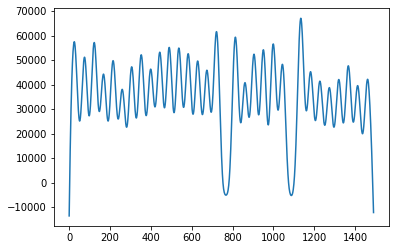

In [8]:
smooth = sig.savgol_filter(sumMatrix, 51, 3)
smooth = sig.savgol_filter(smooth, 51, 3)
smooth = sig.savgol_filter(smooth, 51, 3)
#smooth = sig.savgol_filter(smooth, 51, 3)


plt.plot(np.arange(0, smooth.shape[0]), smooth.transpose())
plt.show()

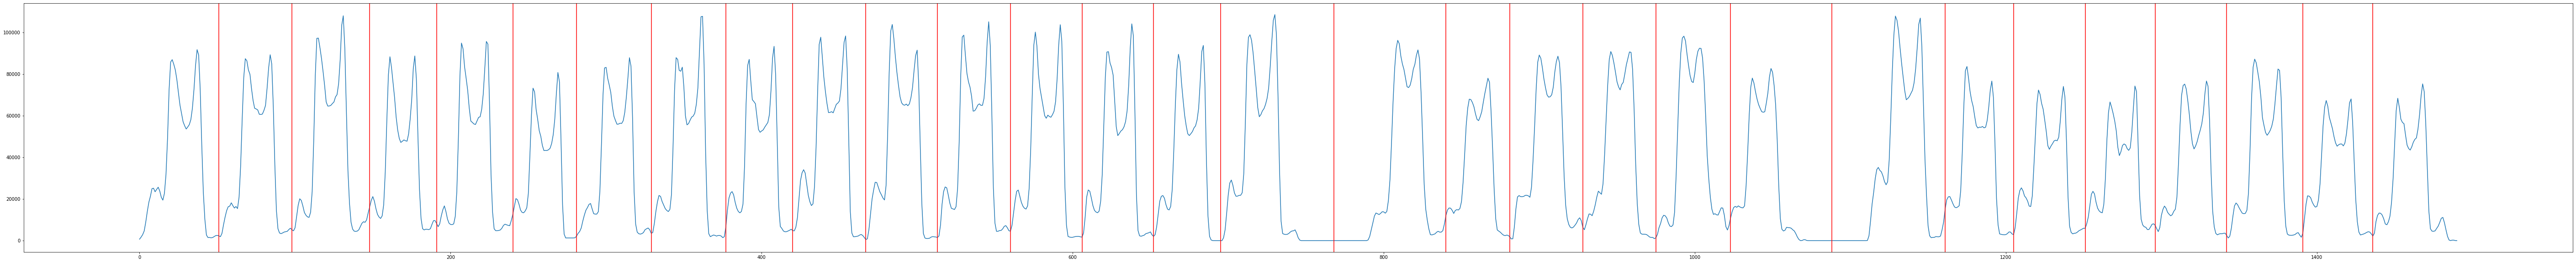

In [9]:
troughs, _ = sig.find_peaks(-smooth)
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for col in troughs:
    plt.axvline(x=col, color="red")
plt.show()

In [ ]:
def padding(first, last, img_length):
    pad = 20
    new_first = first - pad
    if new_first < 0:
        new_first = 0
    new_last = last + pad
    if new_last > img_length:
        new_last = img_length
        
    return new_first, new_last

51-98
cutLine shape (47, 821)
(821,)
first 30, last 732
new first15, new last 747
47


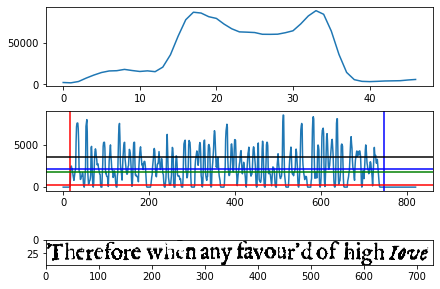

98-148
cutLine shape (50, 821)
(821,)
first 21, last 821
new first6, new last 821
50


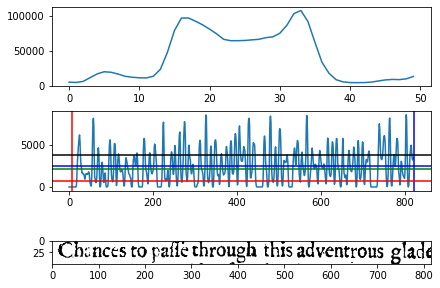

148-191
cutLine shape (43, 821)
(821,)
first 19, last 692
new first4, new last 707
43


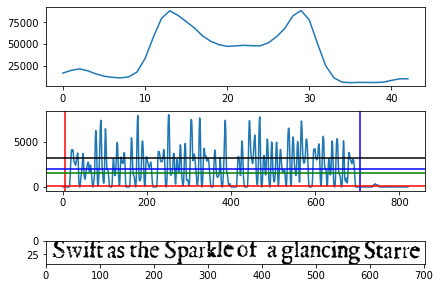

191-240
cutLine shape (49, 821)
(821,)
first 21, last 790
new first6, new last 805
49


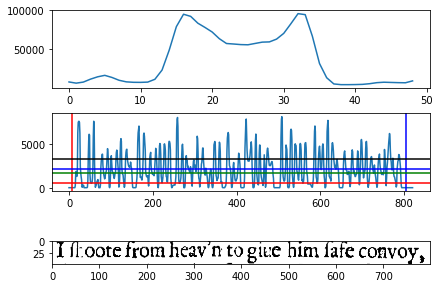

240-281
cutLine shape (41, 821)
(821,)
first 22, last 670
new first7, new last 685
41


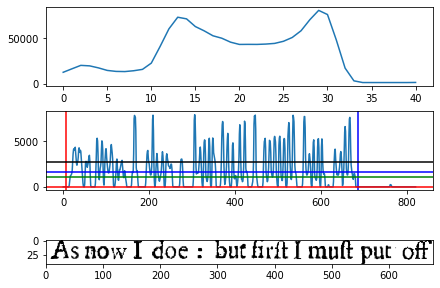

281-329
cutLine shape (48, 821)
(821,)
first 29, last 762
new first14, new last 777
48


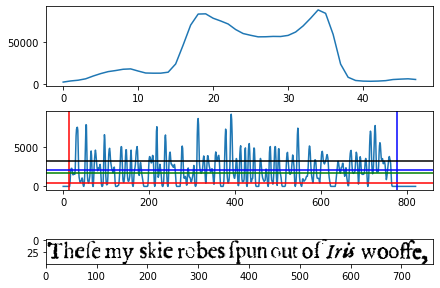

329-377
cutLine shape (48, 821)
(821,)
first 25, last 791
new first10, new last 806
48


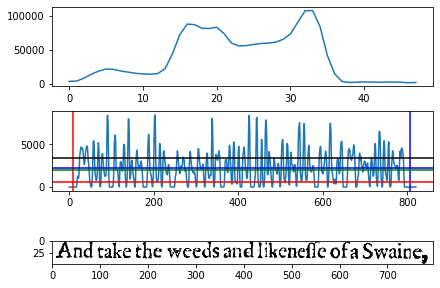

377-420
cutLine shape (43, 821)
(821,)
first 31, last 714
new first16, new last 729
43


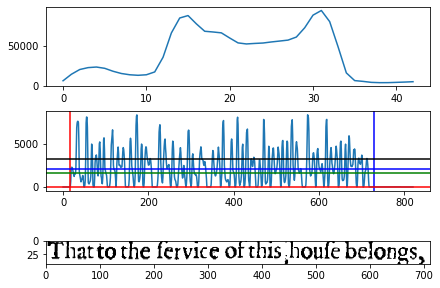

420-467
cutLine shape (47, 821)
(821,)
first 20, last 819
new first5, new last 821
47


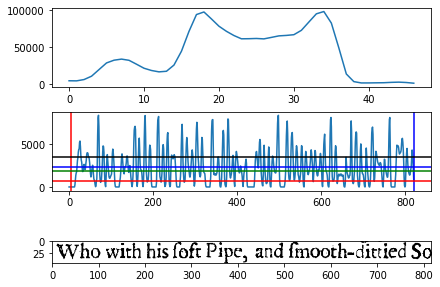

467-513
cutLine shape (46, 821)
(821,)
first 24, last 816
new first9, new last 821
46


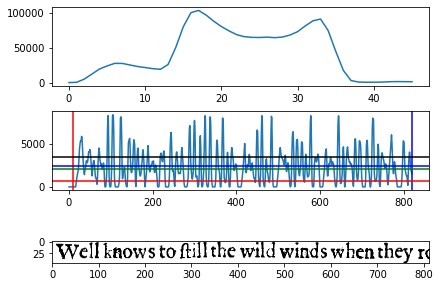

513-560
cutLine shape (47, 821)
(821,)
first 22, last 803
new first7, new last 818
47


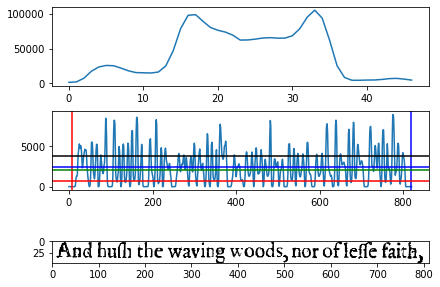

560-606
cutLine shape (46, 821)
(821,)
first 20, last 726
new first5, new last 741
46


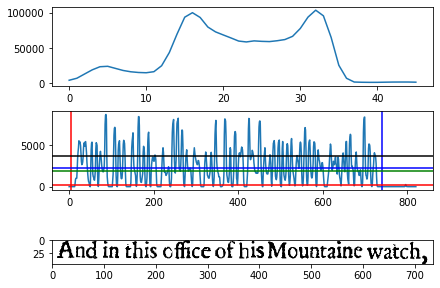

606-652
cutLine shape (46, 821)
(821,)
first 22, last 684
new first7, new last 699
46


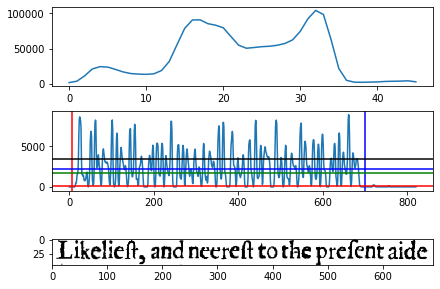

652-695
cutLine shape (43, 821)
(821,)
first 19, last 673
new first4, new last 688
43


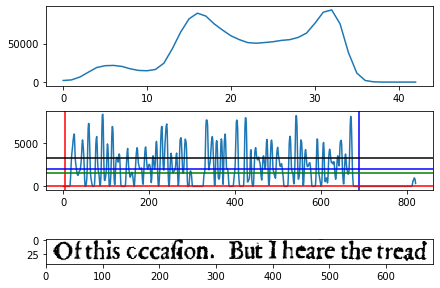

695-768
cutLine shape (73, 821)
(821,)
first 17, last 697
new first2, new last 712
73


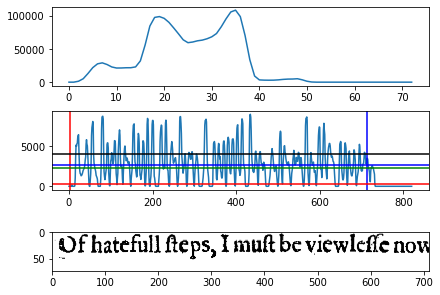

768-840
cutLine shape (72, 821)
(821,)
first 69, last 772
new first54, new last 787
72


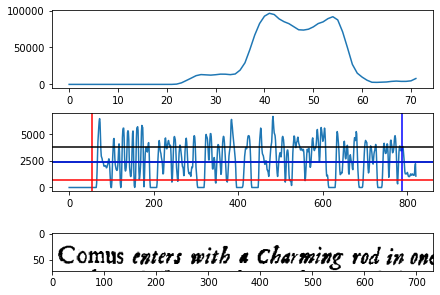

840-881
cutLine shape (41, 821)
(821,)
first 124, last 805
new first109, new last 820
41


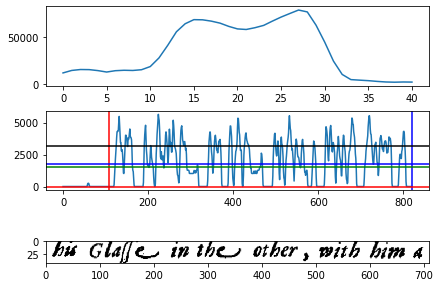

881-928
cutLine shape (47, 821)
(821,)
first 131, last 817
new first116, new last 821
47


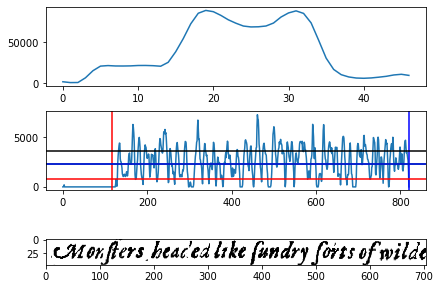

928-975
cutLine shape (47, 821)
(821,)
first 122, last 797
new first107, new last 812
47


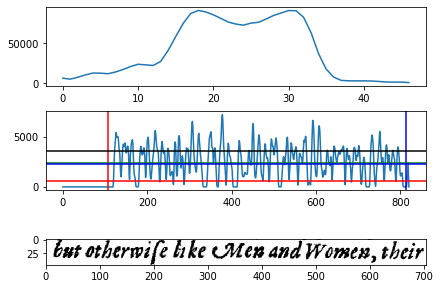

975-1023
cutLine shape (48, 821)
(821,)
first 119, last 819
new first104, new last 821
48


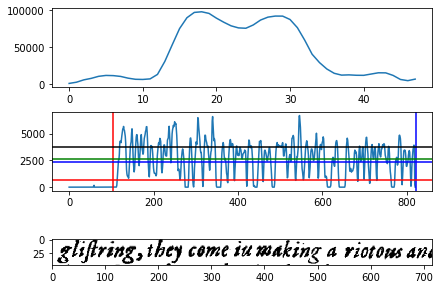

1023-1088
cutLine shape (65, 821)
(821,)
first 127, last 697
new first112, new last 712
65


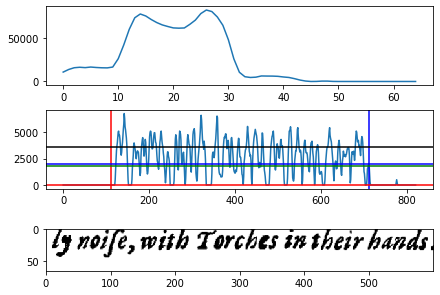

1088-1161
cutLine shape (73, 821)
(821,)
first 60, last 814
new first45, new last 821
73


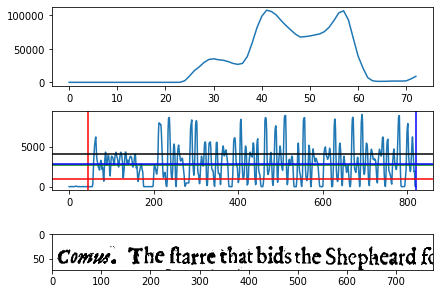

1161-1205
cutLine shape (44, 821)
(821,)
first 18, last 586
new first3, new last 601
44


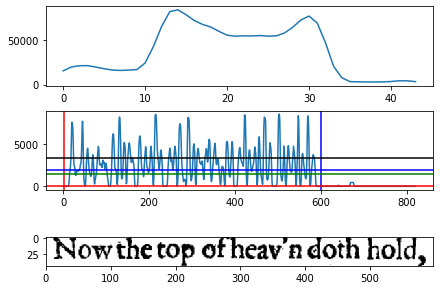

1205-1251
cutLine shape (46, 821)
(821,)
first 16, last 503
new first1, new last 518
46


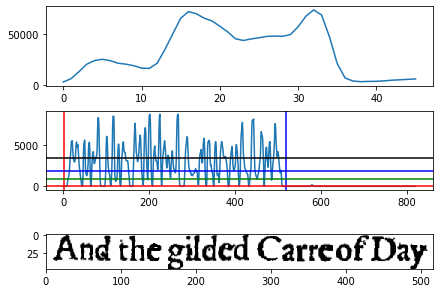

1251-1296
cutLine shape (45, 821)
(821,)
first 13, last 508
new first0, new last 523
45


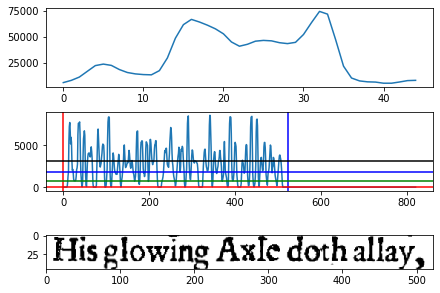

1296-1342
cutLine shape (46, 821)
(821,)
first 12, last 552
new first0, new last 567
46


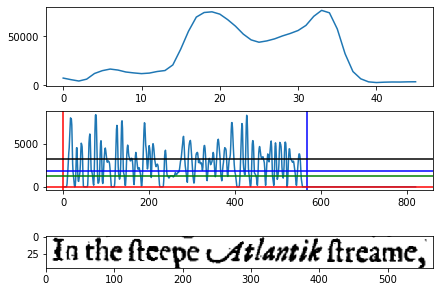

1342-1391
cutLine shape (49, 821)
(821,)
first 16, last 631
new first1, new last 646
49


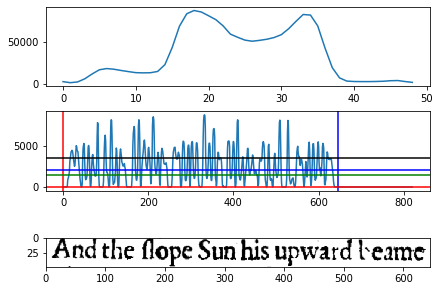

1391-1436
cutLine shape (45, 821)
(821,)
first 12, last 581
new first0, new last 596
45


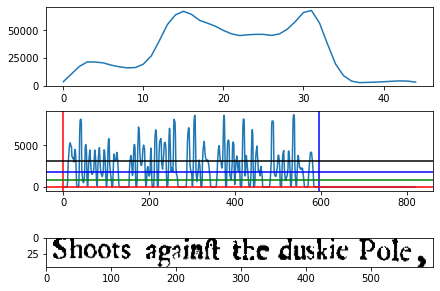

In [14]:
heights = np.zeros(len(troughs) - 1)
for i in np.arange(0,len(troughs) - 1 ):
    start = troughs[i]
    end = troughs[i+1]
    
    print(str(start) + "-" + str(end))

    cutLine = img[start:end,:]
    print("cutLine shape " + str(cutLine.shape))
    
    vertSum = np.sum(255 - cutLine, 0)
    print(vertSum.shape)
    #vertSum = sig.savgol_filter(vertSum, 51, 3)
    #vertSum = sig.savgol_filter(vertSum, 51, 3)
    #print(vertSum.shape)
    
    vertSumList = vertSum.tolist()
    first = next((i for i, val in enumerate(vertSumList) if val > (end-start) * 255 * 0.25), None)
    last = next((j for j, val2 in enumerate(reversed(vertSumList)) if val2 > (end-start) * 255 * 0.25), None)
    if last is not None:
        last = len(vertSumList) - last
    print("first " + str(first) + ", last " + str(last))

    if first is None or last is None:
        print("nothing larger than threshold")
        continue
    
    first, last = padding(first, last, len(vertSum))
    print("new first" + str(first) + ", new last " + str(last))
    
    heights[i] = end-start
    print(end - start)
    
    fig, axs = plt.subplots(3, 1, constrained_layout = True)

    axs[2].imshow(cutLine[:, first:last], cmap="gray")
    axs[1].plot(np.arange(0, vertSum.shape[0]), vertSum.transpose())
    axs[1].axvline(x=first, color="red")
    axs[1].axvline(x=last, color="blue")

    axs[1].axhline(y=np.percentile(vertSum, 25), color="red")
    axs[1].axhline(y=np.percentile(vertSum, 50), color="green")
    axs[1].axhline(y=np.percentile(vertSum, 75), color="black")
    axs[1].axhline(y=np.mean(vertSum), color="blue")

    axs[0].plot(np.arange(0, cutLine.shape[0]), np.sum(255 - cutLine, axis=1))
    plt.show()

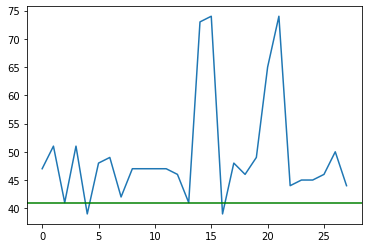

In [29]:
plt.plot(np.arange(0, heights.shape[0]), heights.transpose())
plt.axhline(y=np.percentile(heights, 10), color="green")
plt.show()

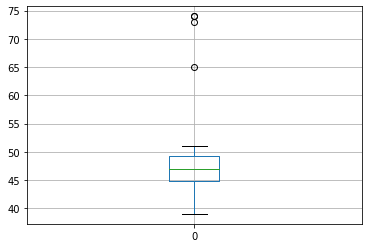

In [30]:
df = pd.DataFrame(heights)
df.boxplot()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True False False  True  True
  True  True  True  True]
(28,)
(29,)
47


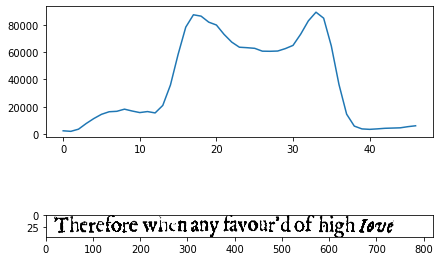

51


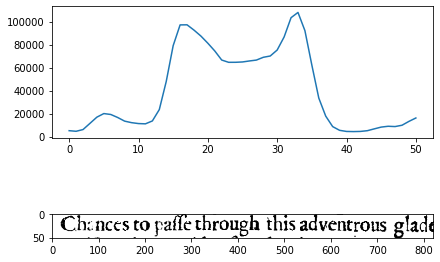

41


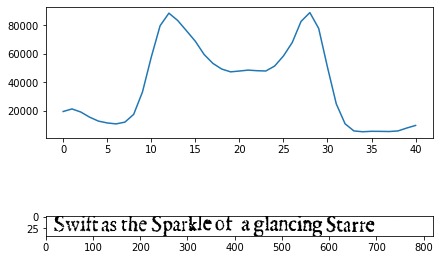

51


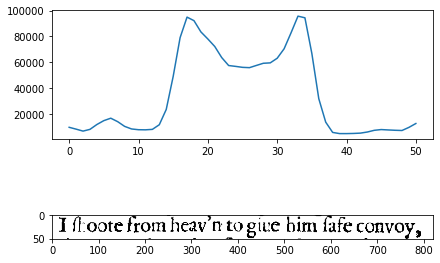

39


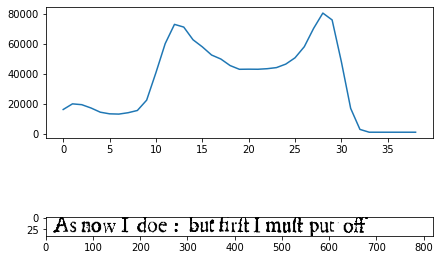

48


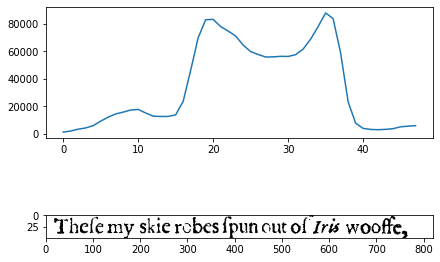

49


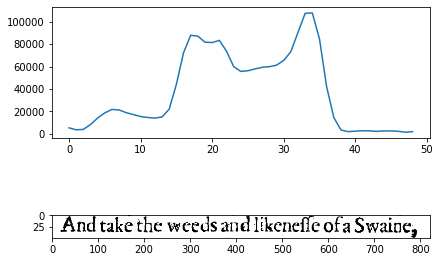

42


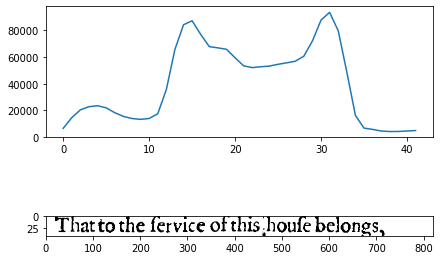

47


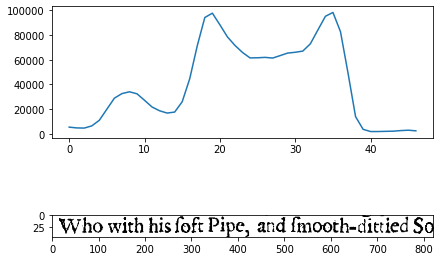

47


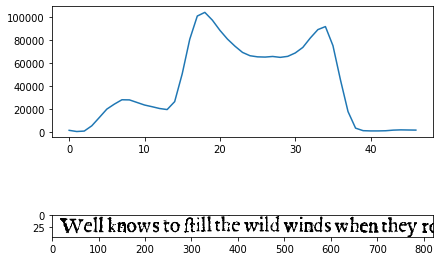

47


KeyboardInterrupt: 

In [31]:
trimHeights = abs(heights - np.median(heights)) < 1.5 * np.std(heights)
print(trimHeights)
print(trimHeights.shape)

newHeights = []
trimTroughs = troughs
print(trimTroughs.shape)
i = 0
while i < trimTroughs.shape[0] - 1:
#for i in np.arange(0,len(trimTroughs) - 1 ):
    if(not trimHeights[i]):
        trimTroughs = np.delete(trimTroughs, i+1, 0)
        trimHeights = np.delete(trimHeights, i, 0)
        #i -= 1
        continue
    start = trimTroughs[i]
    end = trimTroughs[i+1]
    
    fig, axs = plt.subplots(2, 1, constrained_layout = True)

    cutLine = img[start:end,:]
    print(end - start)
    newHeights.append(end-start)
    axs[1].imshow(cutLine, cmap="gray")
    axs[0].plot(np.arange(0, cutLine.shape[0]), np.sum(255 - cutLine, axis=1))
    plt.show()
    i+=1
        
print(trimTroughs.shape)
print(trimTroughs)
print(newHeights)
print(np.mean(newHeights))
print(np.std(newHeights))

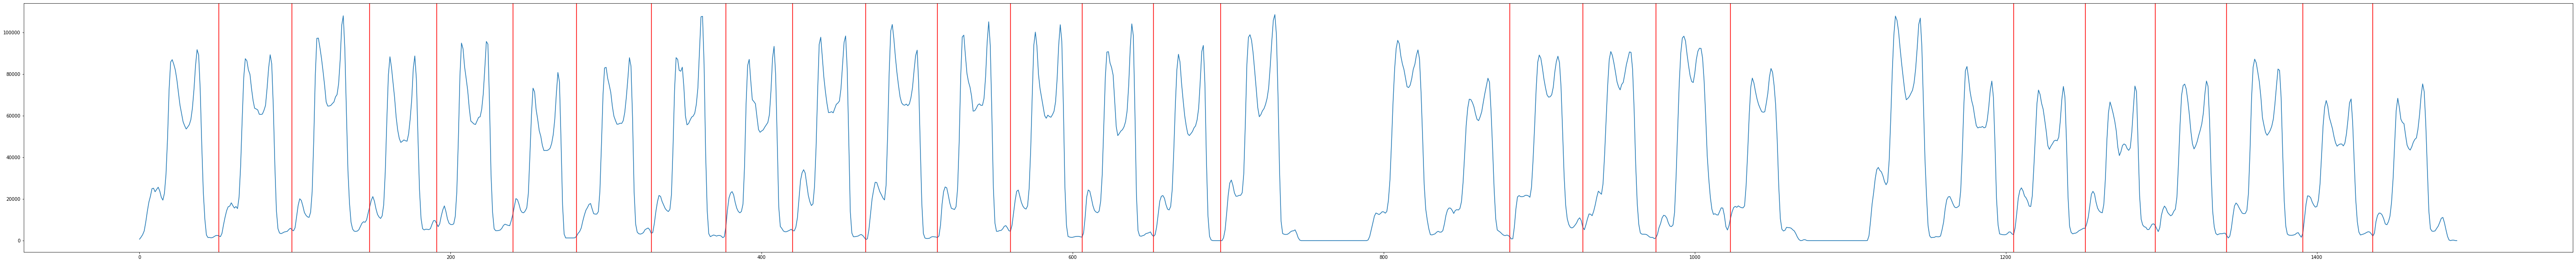

In [16]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for col in trimTroughs:
    plt.axvline(x=col, color="red")
plt.show()

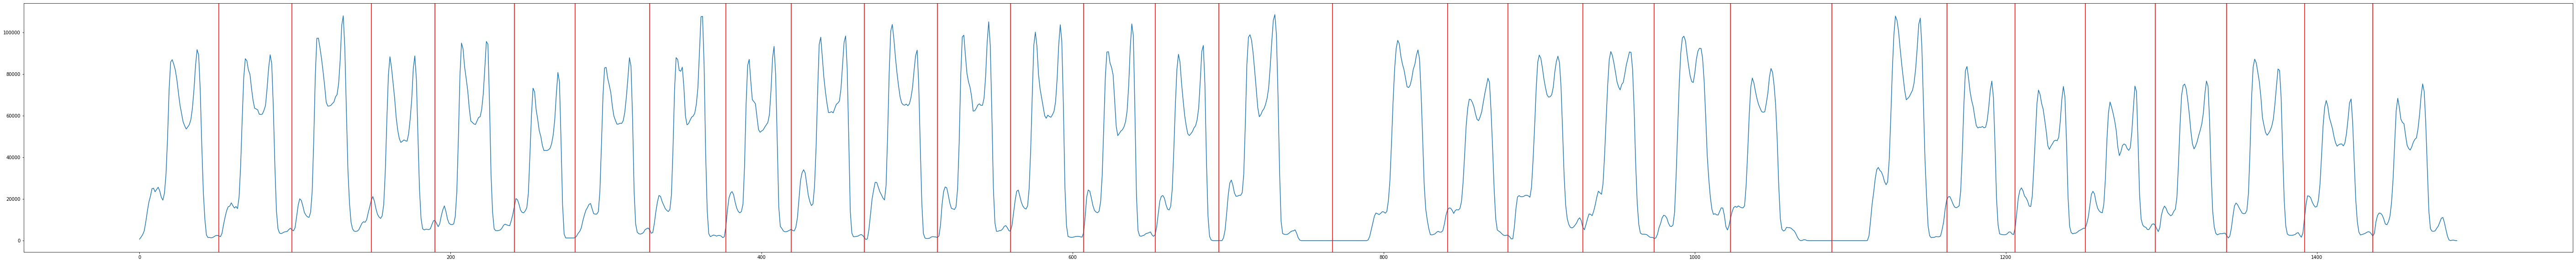

In [25]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for col in troughs:
    plt.axvline(x=col, color="red")
plt.show()

In [12]:
verticalSum = np.sum(255 - img, 0)
print(verticalSum.shape)

(821,)


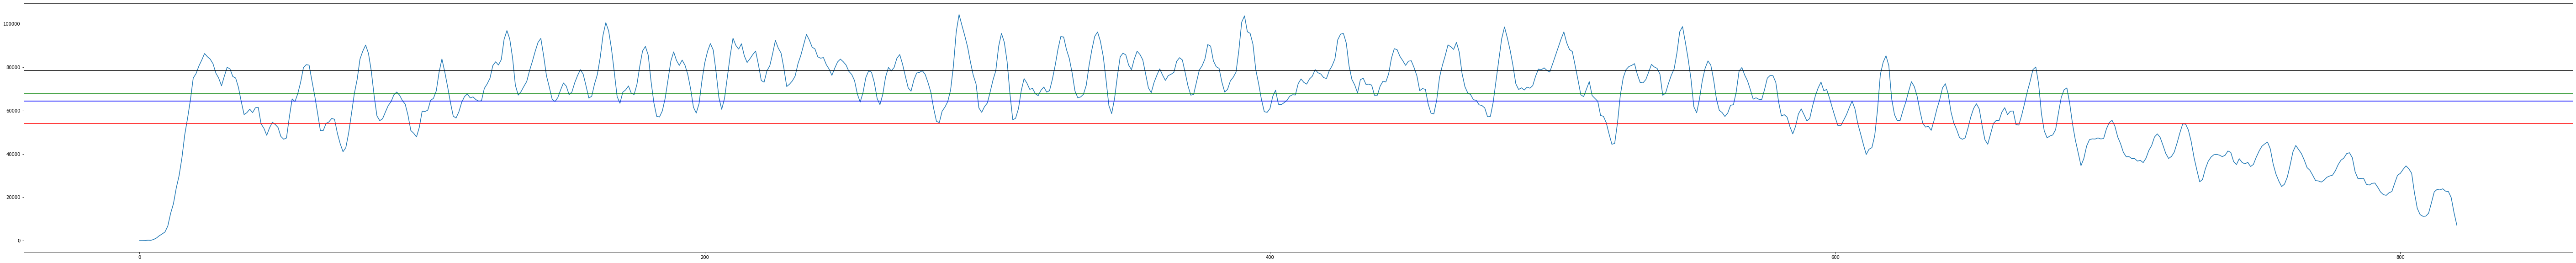

In [13]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, verticalSum.shape[0]), verticalSum.transpose())
plt.axhline(y=np.percentile(verticalSum, 25), color="red")
plt.axhline(y=np.percentile(verticalSum, 50), color="green")
plt.axhline(y=np.percentile(verticalSum, 75), color="black")
plt.axhline(y=np.mean(verticalSum), color="blue")
plt.show()

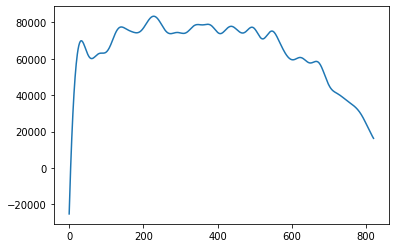

In [17]:
vertSmooth = sig.savgol_filter(verticalSum, 51, 3)
vertSmooth = sig.savgol_filter(vertSmooth, 51, 3)
vertSmooth = sig.savgol_filter(vertSmooth, 51, 3)
vertSmooth = sig.savgol_filter(vertSmooth, 51, 3)


plt.plot(np.arange(0, vertSmooth.shape[0]), vertSmooth.transpose())
plt.show()